# Features Scaling

### i) Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm 

### ii) Load Dataset 

In [2]:
dataset_path = "../dataset/houses.txt"
data = np.loadtxt(dataset_path, delimiter=",")
print(f"data.shape: {data.shape}")

x_train = data[:,:4]; y_train = data[:,-1]
print("x_train.shape: {}, y_train.shape: {}".format(x_train.shape, y_train.shape))

data.shape: (100, 5)
x_train.shape: (100, 4), y_train.shape: (100,)


### iii) Plot Dataset (observe x-y axis ranges)

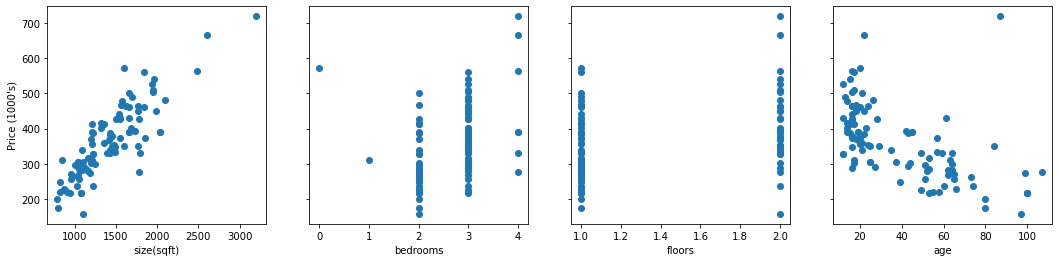

In [3]:
# let's plot the data
x_features = ['size(sqft)','bedrooms','floors','age']

fig, ax = plt.subplots(1,4, figsize=(18,4), sharey=True)  # sharey = share y-axis labels + Value Range

for i in range(len(x_features)):
    ax[i].scatter(x_train[:,i], y_train)
    ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()


### iv) Z-Score Normalization 

After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag{4}$$ 
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{5}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \tag{6}
\end{align}
$$

>**Implementation Note:** 
> - When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. 
> - After learning the parameters
from the model, we often want to predict the prices of houses we have not
seen before. Given a new x value (living room area and number of bed-
rooms), we must first normalize x using the mean and standard deviation
that we had previously computed from the training set.

**Implementation**

In [4]:
x_mean = np.mean(x_train, axis=0)
x_std = np.std(x_train, axis=0)
print("x_mean:{}, \nx_std:{}".format(x_mean, x_std))

x_mean:[1.41371e+03 2.71000e+00 1.38000e+00 3.86500e+01], 
x_std:[412.17283499   0.65261014   0.48538644  25.78502472]


In [5]:
def get_zscore_normalized_features(x):
    """
    computes  x, zcore normalized by column
    
    Args:
      x (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      x_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    x_mean = np.mean(x, axis=0)
    x_std = np.std(x, axis=0)

    x_norm = (x - x_mean) / x_std

    return x_norm, x_mean, x_std

In [6]:
x_norm, x_mean, x_std = get_zscore_normalized_features(x_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(x_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(x_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[2.406e+03 4.000e+00 1.000e+00 9.500e+01]
Peak to Peak range by column in Normalized X:[5.83735704 6.12923357 2.06021411 3.68430905]


### v) Plot Nomralized Features (observe x-y axis ranges)

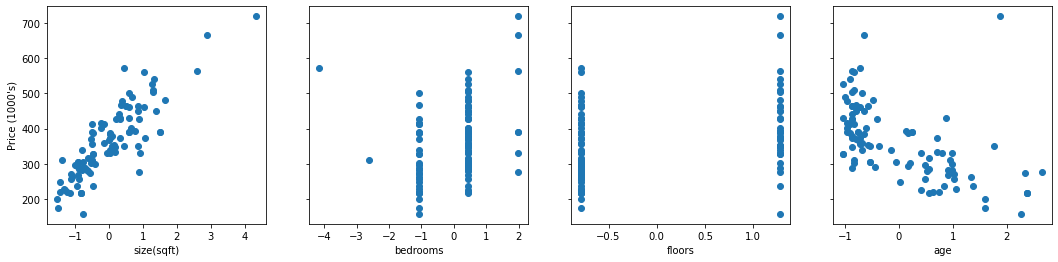

In [7]:
x_features = ['size(sqft)','bedrooms','floors','age']

fig, ax = plt.subplots(1,4, figsize=(18,4), sharey=True)  # sharey = share y-axis labels + Value Range

for i in range(len(x_features)):
    ax[i].scatter(x_norm[:,i], y_train)
    ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

### vi) Plot & Compare Nomralized & Non-Normalized Features (observe x-y axis ranges)

In [8]:
def norm_plot(ax, data):
    scale = (np.max(data) - np.min(data))*0.2
    x = np.linspace(np.min(data)-scale,np.max(data)+scale,50)
    _,bins, _ = ax.hist(data, x, color="xkcd:azure")
    #ax.set_ylabel("Count")
    
    mu = np.mean(data); 
    std = np.std(data); 
    dist = norm.pdf(bins, loc=mu, scale = std)
    
    axr = ax.twinx()
    axr.plot(bins,dist, color = "orangered", lw=2)
    axr.set_ylim(bottom=0)
    axr.axis('off')

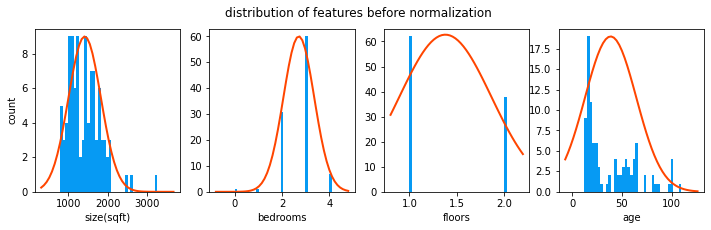

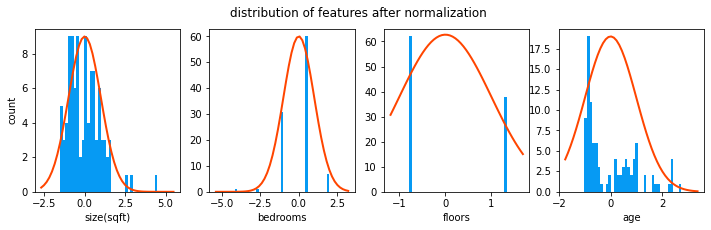

In [9]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    norm_plot(ax[i],x_train[:,i],)
    ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel("count");
fig.suptitle("distribution of features before normalization")
plt.show()
fig,ax=plt.subplots(1,4,figsize=(12,3))
for i in range(len(ax)):
    norm_plot(ax[i],x_norm[:,i],)
    ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel("count"); 
fig.suptitle("distribution of features after normalization")

plt.show()

#### [Go To Home]("../")